In [1]:
import geopandas as gpd

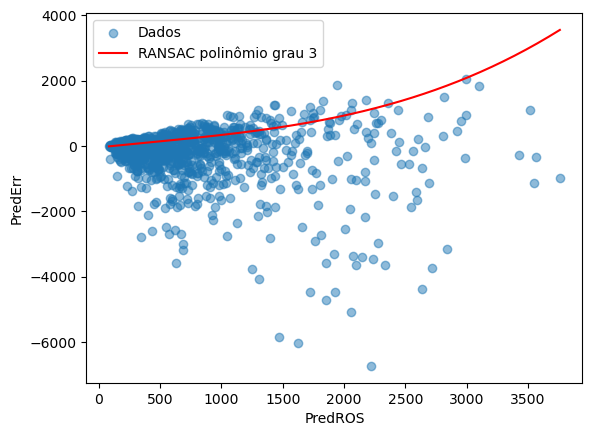

Função polinomial robusta salva em 'PredErr_vs_PredROS_ransac.pkl'


In [5]:
import geopandas as gpd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Carregar shapefile
df = gpd.read_file(r"..\..\Data\Processed\PT-FireSprd_v2.1\L2_FireBehavior\PT-FireProg_v2.1_L2_final_with_SHAP.shp")

# Selecionar colunas e remover NaNs
df_clean = df[['PredROS', 'PredErr']].dropna()
X = df_clean['PredROS'].values.reshape(-1,1)
y = df_clean['PredErr'].values

# Ajuste polinomial robusto (grau 3) usando RANSAC
degree = 3
model = make_pipeline(
    PolynomialFeatures(degree),
    RANSACRegressor(estimator=LinearRegression())  # <--- alteração aqui
)
model.fit(X, y)

# Função para prever PredErr a partir de PredROS
def prederr_from_predros(x):
    x = np.array(x).reshape(-1,1)
    return model.predict(x)

# Visualizar ajuste
plt.scatter(X, y, alpha=0.5, label='Dados')
x_line = np.linspace(X.min(), X.max(), 200)
plt.plot(x_line, prederr_from_predros(x_line), color='red', label=f'RANSAC polinômio grau {degree}')
plt.xlabel('PredROS')
plt.ylabel('PredErr')
plt.legend()
plt.show()

# Salvar função em pickle
with open(r'..\..\Data\Models\PredErr_vs_PredROS_ransac.pkl', 'wb') as f:
    pickle.dump(prederr_from_predros, f)

print("Função polinomial robusta salva em 'PredErr_vs_PredROS_ransac.pkl'")
